In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [53]:
import difflib

## Import Data

In [2]:
# https://www.kaggle.com/datasets/prathameshf/housing-properties-in-maharashtra-big-cities
data = pd.read_csv("housing_prices_data.csv")
data.head()

,locality_name,region_name,price,value_per_sqft,area,construction_status,house_type,total_rooms,total_beds,new_resale,age
0,Tarwala Nagar,Nashik,8499000.0,3761.0,2260.0,Under Construction,Apartment,6.0,4.0,New,-1.0
1,Dombivali,Mumbai,6790000.0,13580.0,500.0,Under Construction,Apartment,4.0,2.0,New,0.0
2,Wagholi,Pune,6030000.0,7811.0,773.0,Under Construction,Apartment,5.0,3.0,New,-3.0
3,Ambegaon Budruk,Pune,3537000.0,7417.0,477.0,Ready to move,Apartment,3.0,1.0,New,0.5
4,Dombivali,Mumbai,9500000.0,10359.0,917.0,Under Construction,Apartment,5.0,3.0,New,-3.0


In [3]:
df = data.copy()

## Exploratory Data Analysis

In [4]:
df.info()
#df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191275 entries, 0 to 191274
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   locality_name        191274 non-null  object 
 1   region_name          191274 non-null  object 
 2   price                191274 non-null  float64
 3   value_per_sqft       191274 non-null  float64
 4   area                 191274 non-null  float64
 5   construction_status  191274 non-null  object 
 6   house_type           191274 non-null  object 
 7   total_rooms          191274 non-null  float64
 8   total_beds           191274 non-null  float64
 9   new_resale           191274 non-null  object 
 10  age                  191274 non-null  float64
dtypes: float64(6), object(5)
memory usage: 16.1+ MB


In [5]:
df.dropna(inplace=True)

In [6]:
df.duplicated().sum()

71364

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.nunique()

locality_name           1676
region_name               36
price                   7880
value_per_sqft         22507
area                    3067
construction_status        2
house_type                 6
total_rooms               13
total_beds                13
new_resale                 3
age                      101
dtype: int64

In [15]:
df['region_name'].unique()

array([' Nashik', ' Mumbai', ' Pune', ' Nagpur', ' Kolhapur', ' Nasik',
       ' Ratnagiri', ' Aurangabad', ' Jalgaon', ' Ahmednagar',
       ' Sindhudurg', ' Raigad', ' Solapur', ' Amravati', ' Alibaugh',
       ' Chandrapur', ' Sangli', ' Satara', ' Lonikand', ' Wardha',
       ' Shirdi', ' Hingoli', ' Yavatmal', ' Jalna', ' Bhandara',
       ' Akola', ' Nanded', ' Parbhani', ' Buldana', ' Dhule',
       ' Osmanabad', ' Latur', ' Baramati', ' Vikramgad', ' Nandurbar',
       ' Beed'], dtype=object)

In [10]:
df[['construction_status']].value_counts()

construction_status
Ready to move          73757
Under Construction     46153
dtype: int64

In [11]:
df[['house_type']].value_counts()

house_type       
Apartment            113511
Studio Apartment       2965
Independent House      1475
Villa                  1375
Independent Floor       562
Penthouse                22
dtype: int64

In [12]:
df[['new_resale']].value_counts()

new_resale
New           60554
Resale        48842
old           10514
dtype: int64

In [13]:
df['room_diff'] = df.total_rooms - df.total_beds
df['room_diff'].value_counts()

2.0    119909
3.0         1
Name: room_diff, dtype: int64

In [16]:
# df.drop(df.columns[[3, 7, 11]], axis=1, inplace=True)
df.drop(['value_per_sqft', 'total_rooms', 'room_diff'], axis=1, inplace=True)
df.rename(columns = {'total_beds':'bhk'}, inplace = True)
df['new_resale'].replace(['old'], 'Resale', inplace=True)
df['price_per_sqft'] = round(df.price/df.area, 2)
df.head()

,locality_name,region_name,price,area,construction_status,house_type,bhk,new_resale,age,price_per_sqft
0,Tarwala Nagar,Nashik,8499000.0,2260.0,Under Construction,Apartment,4.0,New,-1.0,3760.62
1,Dombivali,Mumbai,6790000.0,500.0,Under Construction,Apartment,2.0,New,0.0,13580.00
2,Wagholi,Pune,6030000.0,773.0,Under Construction,Apartment,3.0,New,-3.0,7800.78
3,Ambegaon Budruk,Pune,3537000.0,477.0,Ready to move,Apartment,1.0,New,0.5,7415.09
4,Dombivali,Mumbai,9500000.0,917.0,Under Construction,Apartment,3.0,New,-3.0,10359.87


In [18]:
df.describe()

,price,area,bhk,age,price_per_sqft
count,1.199100e+05,119910.000000,119910.000000,119910.000000,119910.000000
mean,1.472640e+07,1025.981161,1.958019,2.764767,12222.637600
std,3.616657e+07,704.483205,0.934229,6.893728,10163.438346
min,2.200000e+05,113.000000,0.000000,-14.000000,600.000000
25%,4.800000e+06,640.000000,1.000000,0.000000,6020.980000
50%,7.900000e+06,900.000000,2.000000,2.000000,8854.170000
75%,1.470000e+07,1161.000000,2.000000,3.500000,15584.420000
max,9.999000e+08,20000.000000,15.000000,122.500000,189886.780000


<AxesSubplot:>

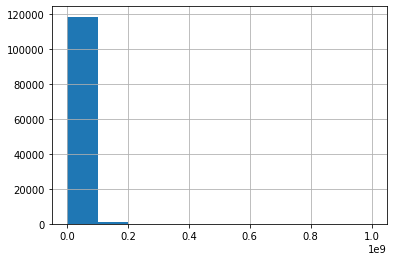

In [20]:
df['price'].hist()

In [64]:
len(df[df['price']>200000000])

434

<AxesSubplot:>

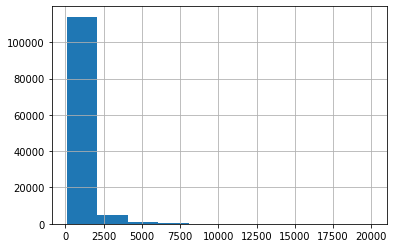

In [65]:
df['area'].hist()

<AxesSubplot:>

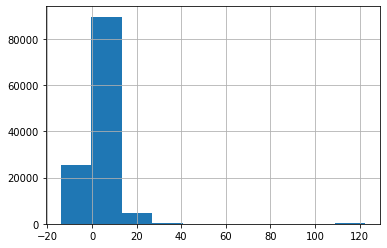

In [21]:
df['age'].hist()

In [22]:
df.corr()

,price,area,bhk,age,price_per_sqft
price,1.000000,0.621775,0.403029,0.045634,0.716623
area,0.621775,1.000000,0.765080,0.100260,0.305339
bhk,0.403029,0.765080,1.000000,0.054321,0.302791
age,0.045634,0.100260,0.054321,1.000000,0.030841
price_per_sqft,0.716623,0.305339,0.302791,0.030841,1.000000


In [33]:
df['Location'] = df['region_name']+" "+df['locality_name']
df.head()

,locality_name,region_name,price,area,construction_status,house_type,bhk,new_resale,age,price_per_sqft,Location
0,Tarwala Nagar,Nashik,8499000.0,2260.0,Under Construction,Apartment,4.0,New,-1.0,3760.62,Nashik Tarwala Nagar
1,Dombivali,Mumbai,6790000.0,500.0,Under Construction,Apartment,2.0,New,0.0,13580.00,Mumbai Dombivali
2,Wagholi,Pune,6030000.0,773.0,Under Construction,Apartment,3.0,New,-3.0,7800.78,Pune Wagholi
3,Ambegaon Budruk,Pune,3537000.0,477.0,Ready to move,Apartment,1.0,New,0.5,7415.09,Pune Ambegaon Budruk
4,Dombivali,Mumbai,9500000.0,917.0,Under Construction,Apartment,3.0,New,-3.0,10359.87,Mumbai Dombivali


In [44]:
locations_list = df['Location'].sort_values().unique()

In [45]:
len(locations_list)

1729

In [46]:
with np.printoptions(threshold=np.inf):
    print(locations_list)

[' Ahmednagar Ahinsanagar' ' Ahmednagar Bhingar'
 ' Ahmednagar Bolhegaon Suburban' ' Ahmednagar Borude Mala'
 ' Ahmednagar Ghulewadi' ' Ahmednagar Karjat' ' Ahmednagar Kedgaon'
 ' Ahmednagar Maliwada' ' Ahmednagar Mukundnagar' ' Ahmednagar Nagardeole'
 ' Ahmednagar Nirmal Nagar' ' Ahmednagar Sarasnagar Road'
 ' Ahmednagar Savedi' ' Ahmednagar Shirdi' ' Ahmednagar Shirur'
 ' Ahmednagar Shrirampur' ' Ahmednagar Tapovan Road'
 ' Ahmednagar Vaidya Vasti' ' Akola Ashary Nagar'
 ' Akola Dahigaon Gawande' ' Akola Jafrabad' ' Akola Jatharpeth'
 ' Akola Kaulkhed' ' Akola Keshav Nagar' ' Akola Khadki' ' Akola Malkapur'
 ' Akola Old City' ' Akola Ranpise Nagar' ' Akola Wankhade Nagar'
 ' Alibaugh Chendhare' ' Alibaugh Kihim' ' Alibaugh Nagaon'
 ' Alibaugh Parhur' ' Alibaugh Revdanda Road' ' Alibaugh Shribag No 2'
 ' Alibaugh Vidya Nagar' ' Amravati Akoli' ' Amravati Arjun Nagar'
 ' Amravati Badnera' ' Amravati Camp Road' ' Amravati Dastur Nagar'
 ' Amravati Gopal Nagar' ' Amravati Kathora' ' Amra

In [47]:
location_similarity = pd.DataFrame(locations_list, columns=['locations_1'])

,locations_1
0,Ahmednagar Ahinsanagar
1,Ahmednagar Bhingar
2,Ahmednagar Bolhegaon Suburban
3,Ahmednagar Borude Mala
4,Ahmednagar Ghulewadi


In [48]:
location_similarity = location_similarity[:-1]
len(location_similarity)

1728

In [52]:
location_similarity['locations_2'] = locations_list[1:]
location_similarity.head()

,locations_1,locations_2
0,Ahmednagar Ahinsanagar,Ahmednagar Bhingar
1,Ahmednagar Bhingar,Ahmednagar Bolhegaon Suburban
2,Ahmednagar Bolhegaon Suburban,Ahmednagar Borude Mala
3,Ahmednagar Borude Mala,Ahmednagar Ghulewadi
4,Ahmednagar Ghulewadi,Ahmednagar Karjat


In [59]:
location_similarity['similarity_score'] = location_similarity.apply(lambda row: difflib.SequenceMatcher(
    None, row['locations_1'], row['locations_2']).ratio(), axis = 1)

In [68]:
location_similarity[location_similarity['similarity_score']>0.8][:50]

,locations_1,locations_2,similarity_score
0,Ahmednagar Ahinsanagar,Ahmednagar Bhingar,0.857143
12,Ahmednagar Savedi,Ahmednagar Shirdi,0.833333
13,Ahmednagar Shirdi,Ahmednagar Shirur,0.888889
14,Ahmednagar Shirur,Ahmednagar Shrirampur,0.900000
42,Amravati Kathora,Amravati Kathora Road,0.871795
60,Aurangabad Beed Bypass Padegaon,Aurangabad Beed Bypass Road,0.866667
85,Aurangabad Satara,Aurangabad Satara Parisar,0.818182
91,Aurangabad Ulkanagari,Aurangabad Ulkanagari Road,0.897959
94,Aurangabad Waluj,Aurangabad Zalta,0.823529
100,Bhandara Khokurala,Bhandara Khokurla,0.972973


In [ ]:
df.reindex(columns=['col3', 'col1', 'col2'])